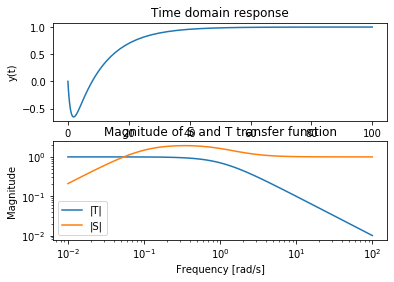

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as scs


# Example 2.7 compares w_B and w_BT as indicators of performance
# it illustrates that w_B might be a better indicator, but care
# must be taken and the phase must also be considered.


# Creates a general transfer function based on the coefficients
# of the numerator and denominator
def TF(num, den, s):
    TF = np.polyval(num, s)/np.polyval(den, s)
    return TF


# Initialize freq range and other constants
w = np.logspace(-2, 2, 100)
z = 0.1
tau = 1

# Coeff found in sage of the T function
Tnum = [-1, z]
Tden = [tau, tau*z + 1, z]

# Time domain output of a step response
[Tim, yout, xout] = scs.lsim((Tnum, Tden), np.ones(np.size(w)), w)
# Plot time domain response
plt.subplot(2, 1, 1)
plt.plot(Tim, yout)
plt.ylabel('y(t)')
plt.xlabel('Time [s]')
plt.title('Time domain response')

# Gain of both S and T transfer functions
Tgain = np.abs([TF(Tnum, Tden, (1j*i)) for i in w])

Sgain = np.abs([TF(Tnum, Tden, (1j*i)) - 1 for i in w])

# Plot Gains
plt.subplot(2, 1, 2)
plt.loglog(w, Tgain)
plt.loglog(w, Sgain)
# TODO plot w180, wbt
plt.legend(["|T|", "|S|"])
plt.ylabel('Magnitude')
plt.xlabel('Frequency [rad/s]')
plt.title('Magnitude of S and T transfer function')
plt.show()

# TODO GM, PM, Ms, Mt, wb, wc
